<a href="https://colab.research.google.com/github/Jessy0786/Mujeres-Digitales-Jessy/blob/main/Taller_Semana_4_Jessy(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigando los accidentes de tránsito en Nueva York

# **Taller 4 Jesyca Maria Patiño Londoño**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introducción

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las vías de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como comuna, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema empresarial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan a las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV que contiene detalles sobre cada accidente como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es; en lugar del predeterminado,. Realizará las siguientes tareas con los datos:

*    Leer, transformar y preparar datos para su visualización
*    Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1.    ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo? Los accidentes disminuyeron, tal y como indica la grafica
2.   Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes? A las 16 y 17 Horas
3.    ¿Hay más accidentes entre semana que los fines de semana? Entre semana hay mas accidentes
4.    ¿Cuál es la proporción de accidentes por área por comuna? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
**a**
* BRONX :             895
* BROOKLYN :         1076
* MANHATTAN :        2135
* QUEENS :            618
* STATEN ISLAND :     148

**b**
* Manhattan tiene muchos accidentes con respecto al area que ocupa
5.    Para cada comuna, ¿durante qué horas es más probable que ocurran accidentes?
* BRONX            16 (Hora)         2952 (Numero de accidentes)
* BROOKLYN         16 (Hora)         5701 (Numero de accidentes)
* MANHATTAN        14 (Hora)         3375 (Numero de accidentes)
* QUEENS           17 (Hora)         5104 (Numero de accidentes)
* STATEN ISLAND    16 (Hora)          775 (Numero de accidentes)
6.    ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
Se omitio : Unspecified
* Driver Inattention/Distraction                            72203.0
* Failure to Yield Right-of-Way                             20413.0
* Following Too Closely                                     17909.0
* Backing Unsafely                                          15068.0
* Passing Too Closely                                       13378.0

In [ ]:
# Use la siguiente informacipón de cada comuna ("borough") para realizar los análisis

borough_data = {'bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}

Tenemos las siguientes columnas

     Borough: el comuna en el que ocurrió el accidente.
     COLLISION_ID: un identificador único para esta colisión
     CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivos del accidente
     CROSS STREET : Calle transversal más cercana al lugar de los accidentes
     DATE: Fecha del accidente
     TIME: Hora del accidente
     DATETIME: la columna que creamos anteriormente con la combinación de fecha y hora
     LATITUDE: Latitud del accidente
     LONGITUDE: Longitud del accidente
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) INJURED: Lesión por categoría
     NUMBER OF (CYCLIST, MOTORIST, PEDESTRIANS) KILLED: Categoría muerte sabia
     ON STREET NAME: Calle donde ocurrió el accidente
     TOTAL INJURED: Total de heridos por el accidente
     TOTAL KILLED: Total de bajas en el accidente
     VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
     ZIP CODE: código postal del lugar del accidente

Primero cargue los datos del csv a un dataframe.

**Nota:** El archivo se encuentra separado por punto y coma ( ; ) en lugar de coma ( , ), así que se debe ingresar el parámetro sep para leer el archivo. Aquí puede encontrar información:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Escriba su código aquí
#df = pd.read_csv('accidents_sample.csv', sep= ';')
df = pd.read_csv('/content/sample_data/accidents.csv', sep= ';')
pd.options.display.max_columns = 5
print(df)

              DATE   TIME  ... VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5
0       09/26/2018  12:12  ...                 NaN                  NaN
1       09/25/2018  16:30  ...                 NaN                  NaN
2       08/22/2019  19:30  ...                 NaN                  NaN
3       09/23/2018  13:10  ...                 NaN                  NaN
4       08/20/2019  22:40  ...                 NaN                  NaN
...            ...    ...  ...                 ...                  ...
238517  01/20/2018  15:00  ...                 NaN                  NaN
238518  01/04/2018  14:00  ...                 NaN                  NaN
238519  01/20/2018  13:05  ...                 NaN                  NaN
238520  01/29/2018  17:45  ...                 NaN                  NaN
238521  01/23/2018  16:38  ...                 NaN                  NaN

[238522 rows x 24 columns]


## Parte 1: Accidentes a lo largo del tiempo

Agrupe los datos disponibles mensualmente y genere una gráfica lineal de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, Name: DATE, dtype: int64


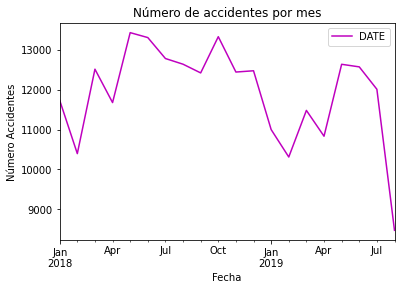

In [ ]:
# Numero de accidentes a lo largo del tiempo
dfg_mes = df['DATE']
dfg_mes= dfg_mes.groupby(pd.PeriodIndex(df['DATE'], freq='M')).count()
print(dfg_mes)
dfg_mes.plot(kind='line',color='m');
plt.ylabel("Número Accidentes")
plt.xlabel("Fecha")
plt.title("Número de accidentes por mes")
plt.legend()
#Los accidentes disminuyeron

## Parte 2: Puntos calientes de accidentes en un día

¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna HORA basada en los datos de la columna DATETIME, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

No handles with labels found to put in legend.


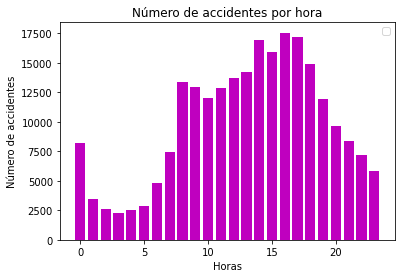

In [ ]:
# Numero de accidentes distribuidos en un día
df['TIME'] = pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour
dfg_hour = df.groupby('HOUR').size()
plt.bar(dfg_hour.index, dfg_hour.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Horas")
plt.title("Número de accidentes por hora")
plt.legend()

## Parte 3: Accidentes por día laborable

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

No handles with labels found to put in legend.


DATE
0    34719
1    35651
2    35188
3    36254
4    37886
5    31784
6    27040
dtype: int64


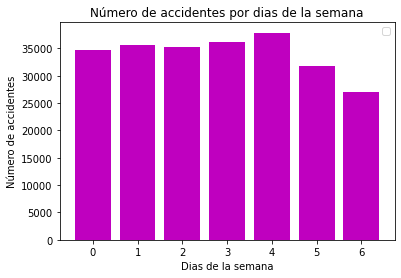

In [ ]:
# Por dia de la semana
df['DATE'] = pd.to_datetime(df['DATE'])
dfg_wd= df.groupby(df['DATE'].dt.weekday).size()
plt.bar(dfg_wd.index, dfg_wd.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Dias de la semana")
plt.title("Número de accidentes por dias de la semana")
plt.legend()
print(dfg_wd)

No handles with labels found to put in legend.


DATE
Friday       37886
Monday       34719
Saturday     31784
Sunday       27040
Thursday     36254
Tuesday      35651
Wednesday    35188
dtype: int64


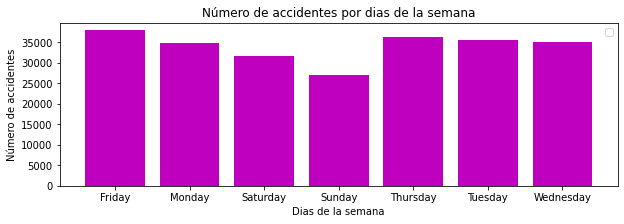

In [ ]:
# Por nombre del dia de la semana
import calendar
df['DATE'] = pd.to_datetime(df['DATE'])
dfg_wd= df.groupby(df['DATE'].dt.day_name()).size()
plt.figure(figsize=(10, 3))
plt.bar(dfg_wd.index, dfg_wd.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("Dias de la semana")
plt.title("Número de accidentes por dias de la semana")
plt.legend()

print(dfg_wd)

## Parte 4: Análisis de comuna

Trace un gráfico de barras del número total de accidentes en cada comuna, así como uno de los accidentes por kilómetro cuadrado por comuna. ¿Qué puedes concluir?

No handles with labels found to put in legend.


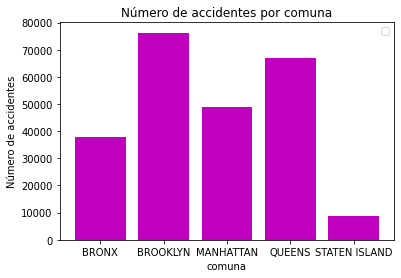

In [ ]:
# Número de accidentes por comuna
dfg_c= df.groupby(df['BOROUGH']).size()
print(dfg_c)
plt.bar(dfg_c.index, dfg_c.values, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("comuna")
plt.title("Número de accidentes por comuna")
plt.legend()

No handles with labels found to put in legend.


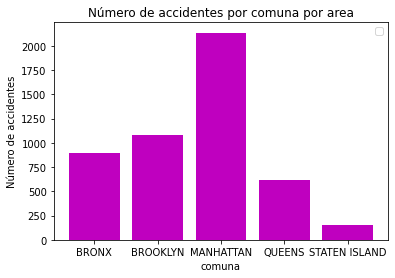

In [ ]:
# Escriba su código aquí Número de accidentes por comuna por area
dfg_ca= df.groupby(df['BOROUGH']).size()

indexList = dfg_ca.index.tolist()
listValues = dfg_ca.values
index = 0
for key in indexList:
  key = str(key).lower()  
  listValues[index] = dfg_ca.values[index]/borough_data[key]['area']
  index = index + 1

plt.bar(dfg_ca.index, listValues, color="m")
plt.ylabel("Número de accidentes")
plt.xlabel("comuna")
plt.title("Número de accidentes por comuna por area")
plt.legend()



In [ ]:
print(dfg_ca)

BOROUGH
BRONX             895
BROOKLYN         1076
MANHATTAN        2135
QUEENS            618
STATEN ISLAND     148
dtype: int64


## Parte 5: Análisis por hora del comuna

¿Qué horas tienen más accidentes en cada comuna? Trace un gráfico de barras para cada comuna que muestre el número de accidentes por cada hora del día.

           BOROUGH  HOUR  NumAccidents
0            BRONX     0          1329
1            BRONX     1           529
2            BRONX     2           402
3            BRONX     3           361
4            BRONX     4           418
..             ...   ...           ...
115  STATEN ISLAND    19           415
116  STATEN ISLAND    20           367
117  STATEN ISLAND    21           268
118  STATEN ISLAND    22           224
119  STATEN ISLAND    23           174

[120 rows x 3 columns]


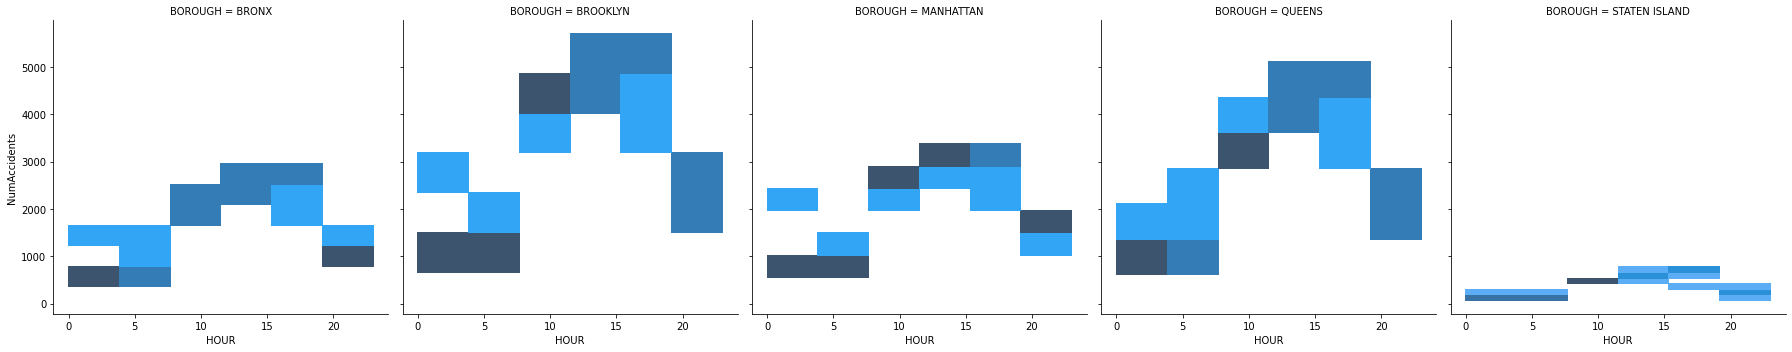

In [ ]:
#g = sns.FacetGrid(churn, col='Attrition_Flag', height=4, aspect=1.2)
#g.map(sns.histplot, 'Customer_Age')

# Escriba su código aquí
df['TIME'] = pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour

dfg_Comuna_hour =df.groupby(['BOROUGH', 'HOUR'])['HOUR'].size().reset_index(name="NumAccidents")
print(dfg_Comuna_hour)

g = sns.FacetGrid(dfg_Comuna_hour, col='BOROUGH', height=5)
g.map(sns.histplot, 'HOUR', "NumAccidents")

#dfg_hour.index
#dfg_hour.values
#print(df['BOROUGH'].unique())
#g = sns.FacetGrid(dfg_hour, col=dfg_hour['BOROUGH'])
#g.map(sns.histplot, dfg_hour.values)


In [ ]:
# Para ver los datos de los numeros de accidentes en un rango determinado
print(dfg_Comuna_hour.iloc[95:])

           BOROUGH  HOUR  NumAccidents
95          QUEENS    23          1528
96   STATEN ISLAND     0           200
97   STATEN ISLAND     1            95
98   STATEN ISLAND     2            78
99   STATEN ISLAND     3            65
100  STATEN ISLAND     4            68
101  STATEN ISLAND     5            71
102  STATEN ISLAND     6           152
103  STATEN ISLAND     7           241
104  STATEN ISLAND     8           479
105  STATEN ISLAND     9           427
106  STATEN ISLAND    10           433
107  STATEN ISLAND    11           454
108  STATEN ISLAND    12           527
109  STATEN ISLAND    13           567
110  STATEN ISLAND    14           712
111  STATEN ISLAND    15           596
112  STATEN ISLAND    16           775
113  STATEN ISLAND    17           698
114  STATEN ISLAND    18           605
115  STATEN ISLAND    19           415
116  STATEN ISLAND    20           367
117  STATEN ISLAND    21           268
118  STATEN ISLAND    22           224
119  STATEN ISLAND    23 

## Parte 6: Causa de accidentes

¿Qué factores provocan la mayoría de los accidentes?

In [ ]:
# Escriba su código aquí
#CONTRIBUTING FACTOR VEHICLE 1
#CONTRIBUTING FACTOR VEHICLE 2
#CONTRIBUTING FACTOR VEHICLE 3
#CONTRIBUTING FACTOR VEHICLE 4
#CONTRIBUTING FACTOR VEHICLE 5
#print(df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts())
print(pd.concat(
    [df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 3'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 4'].value_counts(), df['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()], 
    axis=1
    ).sum(axis=1))


Unspecified                                              240164.0
Driver Inattention/Distraction                            72203.0
Failure to Yield Right-of-Way                             20413.0
Following Too Closely                                     17909.0
Backing Unsafely                                          15068.0
Passing Too Closely                                       13378.0
Passing or Lane Usage Improper                            12953.0
Other Vehicular                                           11093.0
Turning Improperly                                         6798.0
Unsafe Lane Changing                                       6986.0
Traffic Control Disregarded                                5146.0
Driver Inexperience                                        4431.0
Unsafe Speed                                               3530.0
Reaction to Uninvolved Vehicle                             3190.0
Alcohol Involvement                                        2514.0
View Obstr